# Homework project for the "Differential Equations" course module

1. Solve the wave equation `dt^2 u(t,x) = dx^2 u(t,x)` numerically. Use a `1+1`-dimensional domain, and use Dirichlet boundary conditions `u(t,-L) = u(t,+L) = 0`. Use the spatial domain bounds `[-1; +1]`, and use the Gaussian-like function `f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)` as initial condition. Use `L=1, A=1, W=0.2` as parameters. Evolve from `t=0` to `t=4L`, i.e. for two crossing times. Plot the result.

2. Vary the time step size `dt`. If you choose `dt` too large, the discrete system will be unstable. What is the stability limit? Why does this happen? How could you avoid this limit?

3. The energy density of a scalar wave is `epsilon(t,x) = 1/2 ((d/dt u(t,x))^2 + ((d/dx u(t,x))^2)`. Calculate the energy density as a function of space and time for your solution. Plot the result.

4. To calculate the total energy `E(t)` as a function of time, you need to integrate it over space. One way to do so is using the function below. Calculate and show the total energy `E(t)` as a function of time. How well is the energy conserved? How does this depend on the grid spacings `dx` and `dt?

## Problem 1 ##

In [2]:
# Coordinates of grid

function coords(starttime, startspatial, numtime, numspatial, dt, dx)
    # makes total of 
    t = [starttime + (n * dt) for i in 0:numspatial, n in 0:numtime] # timefinish = starttime + numtime*dt
    x = [startspatial + (i * dx) for i in 0:numspatial, n in 0:numtime]
    return t, x
end

coords (generic function with 1 method)

In [3]:
# Given parameters
L = 1 # spatial domain width
A = 1 # amplitude of initial forcing
W = 0.1 # period of initial forcing

starttime = 0
finishtime = 4*L
numtime = 5000
dt = (finishtime-starttime)/numtime

startspatial = -L
finishspatial = L
numspatial = 1000
dx = (finishspatial-startspatial)/numspatial

t, x = coords(starttime, startspatial, numtime, numspatial, dt, dx);

**Note** I spoke to Eric and he proposed a different initial condition so that the derivatives of the function would not be discontinuous near the spatial boundary.

In [4]:
# Define initial conditions for a standing wave
function standing(t, x, A, W)
    numspatial, numtime = size(t)
    u = zeros(numspatial, numtime)
    
    # Initial conditions for first two points in time
    # f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)
    for n in 1:2, i in 1:numspatial
        #u[i, n] = A*exp((-1/2)*(1/W^2)*(sin(2*pi*(x[i,n]-t[i,n])))^2)
        u[i, n] = A*exp((-1/2)*(1/W^2)*(x[i,n]-t[i,n])^2)
    end
    return u
end

standing (generic function with 1 method)

In [5]:
# Find the solution at one interior point `u[i,n]`
# n indexes in TIME
# i indexes in SPACE
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / dx^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [6]:
# Find the solution for one point in time `n`
# Evolve spatially from Dirichlet boundary conditions
function evolve_step!(u, dt, dx, n)
    numspace, numtime = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:numspace-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[numspace,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [7]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

We can now call all the above functions to generate a solution of the wave equation given its spatial behavior at initial time. 

In [8]:
u = standing(t, x, A, W); # initial condition
evolve!(u, dt, dx) # solve!

In [9]:
using CairoMakie

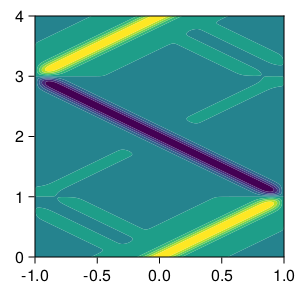

In [10]:
fig1 = Figure(resolution = (300, 300))
ax = Axis(fig1[1, 1])
contourf!(vec(x[:,1]), vec(t[1,:]), u)
fig1

We see indeed a "travelling wave" that ends up being "reflected back" twice against the spatial boundary, corresponding to the question's assertion that there will be two crossing times.

## Problem 2 ##

In [23]:
# Change coarseness of grid

numtime = 500
dt = (finishtime-starttime)/numtime

numspatial = 100
dx = (finishspatial-startspatial)/numspatial

t, x = coords(starttime, startspatial, numtime, numspatial, dt, dx);

In [24]:
# rerun solution calculation 
u = standing(t, x, A, W); # initial condition
evolve!(u, dt, dx) # solve!

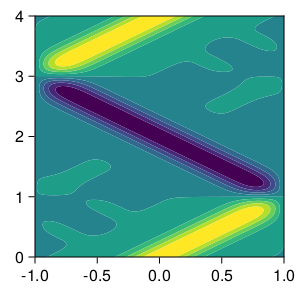

In [25]:
fig1 = Figure(resolution = (300, 300))
ax = Axis(fig1[1, 1])
contourf!(vec(x[:,1]), vec(t[1,:]), u)
fig1

With a less fine grid in both space and time, we see more variance in the solution / broader contours but the same overall behavior. 

In [26]:
# Don't evolve time finely enough, i.e. dt "too small"
# What does "too small mean?" dt should be at most equal to dx, ideally smaller 

dt = 0.01
numtime = (finishtime-starttime)/dt

dx = 0.001
numspatial = (finishspatial-startspatial)/dx

t, x = coords(starttime, startspatial, numtime, numspatial, dt, dx);

In [27]:
# rerun solution calculation 
u = standing(t, x, A, W); # initial condition
evolve!(u, dt, dx) # solve!

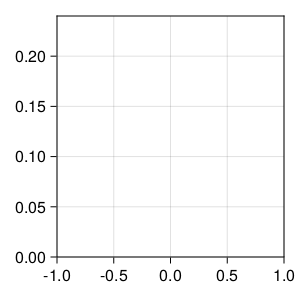

In [28]:
# plot!
fig1 = Figure(resolution = (300, 300))
ax = Axis(fig1[1, 1])
contourf!(vec(x[:,1]), vec(t[1,:]), u)
fig1

We see that the solution is not plotted because there are divergences (large values in u(x,t)) that the contour function does not know how to handle.

**Discussion** It's my understanding that the algorithm would perform arguably well so long as $dt \leq dx$. Obviously lower values of both will lead to higher accuracy. However, for $dt > dx$, too much error is propogatted as we're using $u_{xx}$ and $dt$ to compute $u(x_i,t_n)$ in evolve_point! i.e. $u(x_i,t_n)$ depends on $dt/dx$ and so this should be small. 

Were we to compute $u(x_i,t_n)$ using $u_{tt}$ and $dx$ and iterate over $i$ in evolve! (not that we have the correct boundary conditions for this), then I suspect stability would require $dx \leq dt$. 

## Problem 3 ##

In [29]:
function differ(vecter, lengthy)
    # weeeeeeee
    n = length(vecter)
    diffs = zeros(n)
    for i in 1:n
        if i == 1
            diffs[i] = (vecter[i+1]-vecter[i])/lengthy
        elseif i == n
            diffs[i] = (vecter[i]-vecter[i-1])/lengthy
        else
            diffs[i] = (vecter[i+1]-vecter[i-1])/(2*lengthy)
        end
    end
    return diffs
end

differ (generic function with 1 method)

In [30]:
# Re-run solution for u

# Given parameters
L = 1 # spatial domain width
A = 1 # amplitude of initial forcing
W = 0.2 # period of initial forcing

starttime = 0
finishtime = 4*L
numtime = 5000
dt = (finishtime-starttime)/numtime

startspatial = -L
finishspatial = L
numspatial = 1000
dx = (finishspatial-startspatial)/numspatial

t, x = coords(starttime, startspatial, numtime, numspatial, dt, dx);

u = standing(t, x, A, W); # initial condition
evolve!(u, dt, dx) # solve!

In [31]:
ui, un = size(u)
epsilonfunc = zeros(ui,un)

ut = zeros(ui,un)
for i in 1:ui
    ut[i, :] = differ(vec(u[i,:]),dt) # time derivative vector 
end

ux = zeros(ui,un)
for n in 1:un
    ux[:, n] = differ(vec(u[:,n]),dx) # x derivative vector
end

# now ux, ut are vectors with the same dimensions / indices as u storing du/dx, dt/dx 
        
for i in 1:ui
    for n in 1:un
        epsilonfunc[i,n] = (1/2)*((ut[i,n])^2 + (ux[i,n])^2)
    end
end

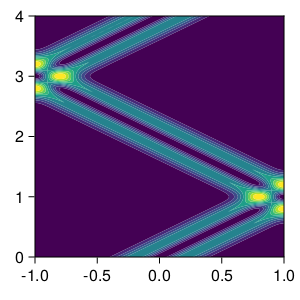

In [32]:
# plot!
fig1 = Figure(resolution = (300, 300))
ax = Axis(fig1[1, 1])
contourf!(vec(x[:,1]), vec(t[1,:]), epsilonfunc)
fig1

## Problem 4 ##

In [33]:
# Integrate `epsilon` over space
function integrate(epsilon, n, dx)
    ni, nt = size(epsilon)
    # The boundary points are special; they have a weight of 1/2.
    # There are `ni` points overall, and the grid spacing is `dx = 2L/(ni-1)`.
    # Integrating the constant function `epsilon=1` thus gives exactly `2L`.
    E = epsilon[1, n] / 2
    for i in 2:ni-1
        E += epsilon[i, n]
    end
    E += epsilon[ni, n] / 2
    # Scale by the grid spacing
    E *= dx
    return E
end

integrate (generic function with 1 method)

In [34]:
ui, un = size(u)
EofT = zeros(un)
for n = 1:un
    EofT[n] = integrate(epsilonfunc,n,dx)
end

In [35]:
minimum(EofT)

4.430962973602389

In [36]:
maximum(EofT)

4.431075922146993

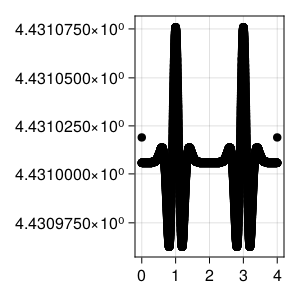

In [37]:
fig1 = Figure(resolution = (300, 300))
ax = Axis(fig1[1, 1])
plot!(vec(t[1,:]), EofT)
fig1

**Thus** we see that, as expected, when integrating the energy density over space to give energy as a function in time, it is effectively constant. The oscillation shown above is magnified, and the values of $E(t)$ only range from 4.43096 to 4.43107.